In [59]:
import pandas as pd
data = pd.read_excel(r"https://bdamlstudiostorage.blob.core.windows.net/sampledata/Cleand.xlsx",sheet_name='Cleand')
data.head()

,Idnumber,Sex,Anatomical subtype1,Anatomical subtype2,Adverse outcomes1,Adverse outcomes2,Chromosomal microarray,Maternal miscarriages,YearBorn_2000,YearBorn_2010,YearBorn_2020,Indicator_Death,FamilyD_Aortopathy,FamilyD_Cardiomyopathy,FamilyD_Congenital Heart Disease,LifeSpan
0,005-HLH-001,M,Mitral atresia,Aortic atresia,Early Fontan takedown,Death,Normal,3,False,True,False,1,0,0,0,5
1,015-HLH-001,M,Mitral atresia,Aortic atresia,Late Fontan takedown,Death,Normal,0,True,False,False,1,1,0,0,24
2,048-HLH-001,M,Mitral stenosis,Aortic stenosis,Heart failure,Death,Normal,0,False,True,False,1,0,0,0,5
3,049-HLH-001,M,Mitral atresia,Aortic atresia,Heart failure,Transplant,15q11.2 deletion,1,False,False,True,0,0,0,0,10
4,056-HLH-001,F,Mitral stenosis,Aortic stenosis,Heart failure,NaN,Normal,1,False,True,False,0,0,0,0,14


In [60]:
print(data.columns)

Index(['Idnumber', 'Sex', 'Anatomical subtype1', 'Anatomical subtype2',
       'Adverse outcomes1', 'Adverse outcomes2', 'Chromosomal microarray',
       'Maternal miscarriages', 'YearBorn_2000', 'YearBorn_2010',
       'YearBorn_2020', 'Indicator_Death', 'FamilyD_Aortopathy',
       'FamilyD_Cardiomyopathy', 'FamilyD_Congenital Heart Disease',
       'LifeSpan'],
      dtype='object')


In [61]:

df = pd.DataFrame(data) 
W_df = df[['Sex', 'Anatomical subtype1', 'Anatomical subtype2',
       'Adverse outcomes1', 'Adverse outcomes2', 'Chromosomal microarray',
       'Maternal miscarriages', 'YearBorn_2000', 'YearBorn_2010',
       'YearBorn_2020', 'Indicator_Death', 'FamilyD_Aortopathy',
       'FamilyD_Cardiomyopathy', 'FamilyD_Congenital Heart Disease',
       'LifeSpan']]

In [4]:
pip install gower

  Created wheel for gower: filename=gower-0.0.5-cp36-none-any.whl size=4232 sha256=164af5a0954d6d69481da6bfe7c120f99375c6846c702ae4cb88f1df04b5a477
  Stored in directory: /home/azureuser/.cache/pip/wheels/c0/09/9b/072d54d6ced0f43a179852e3f09532d0131e25ff7cb4e5ee75
Successfully built gower
Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

In [63]:
import gower

#gower.gower_matrix(W_df)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

dm = gower.gower_matrix(W_df)
Zd = linkage(dm) 

In [75]:
which = lambda lst:list(np.where(lst)[0])
TWssLst = []


In [107]:
for k in range(2,15):
    cld = fcluster(Zd, k, criterion='maxclust')
    TWss = 0
    for j in range(1,k+1):
        tempData = data.iloc[which(cld == j)]
        m = pd.DataFrame(gower.gower_matrix(tempData))
        Wss = 0
        for i in range(1,m.shape[0]):
            Wss = Wss + sum(m[i][:i])
        TWss = TWss + Wss
    TWssLst.append(TWss)    
    

        
        
    
    

In [101]:
TWssLst = [130.75,57.33,47.28,42.67,29.89,29.01,24.86,20.72,16.94,14.24,9,8.70,6.9]
K =[2,3,4,5,6,7,8,9,10,11,12,13,14]

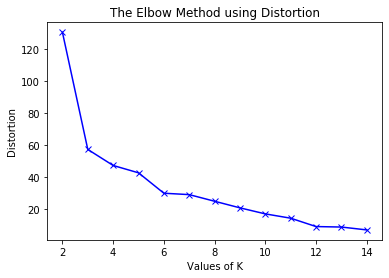

In [102]:
plt.plot(K, TWssLst, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [103]:
cld = fcluster(Zd, 6, criterion='maxclust')
data['ClusterId'] = cld

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [55.0, 55.0, 74.375, 74.375],
  [40.0, 40.0, 64.6875, 64.6875],
  [25.0, 25.0, 52.34375, 52.34375],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [38.671875, 38.671875, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [190.0, 190.0, 221.875, 221.875],
  [175.0, 175.0, 205.9375, 205.9375],
  [165.0, 165.0, 190.46875, 190.46875],
  [150.0, 150.0, 177.734375, 177.734375],
  [80.5859375, 80.5859375, 163.8671875, 163.8671875],
  [10.0, 10.0, 122.2265625, 122.2265625]],
 'dcoord': [[0.0, 0.42642484863544017, 0.42642484863544017, 0.0],
  [0.0, 0.2923067906935011, 0.2923067906935011, 0.0],
  [0.0, 0.313

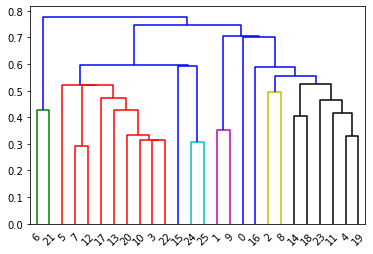

In [104]:
dendrogram(Zd) 

In [106]:
data.to_csv("Cluster.csv")